In [2]:
import sys
sys.path.append('../')

from collections import Counter
from math import log
import pandas as pd
from matplotlib import pyplot as plt


from evolution import Evolver

def shannon(string):
    counts = Counter(string)
    str_len = len(string)
    frequencies = ((i / str_len) for i in counts.values())
    return(-sum(f * log(f, 2) for f in frequencies))

#s = lambda i : - sum(f * log(f, 2) for f in ((j / len(i)) for j in Counter(i).values()))


In [3]:
evolver =  Evolver("flatrates")
x = []
for _ in range(10000):
    x.append(shannon(evolver.randomseq(25)))


In [4]:
evolver =  Evolver("codonrates")
y = []
for _ in range(10000):
    y.append(shannon(evolver.randomseq(24)))


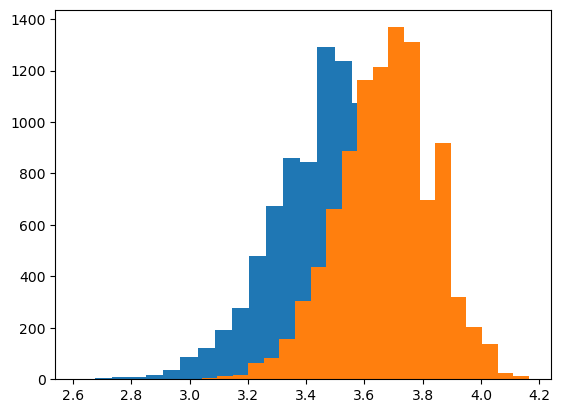

In [5]:
hist = plt.hist(y, bins=25)
hist = plt.hist(x, bins=25)

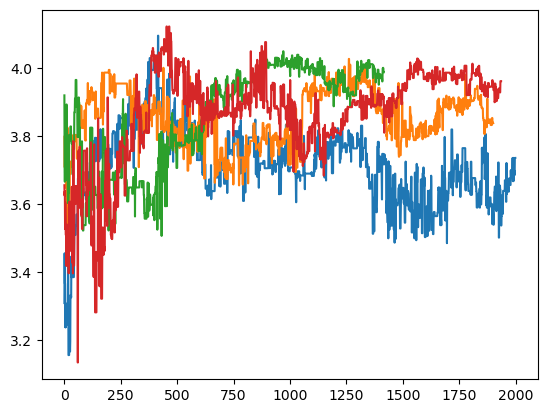

In [6]:
for i in range(1,5):
    lineage = pd.read_csv(f'../../TESTS/dGtest{i}/visual_pfes_results/bestlog.tsv', sep='\t', comment='#')
    y = []
    for seq in lineage.sequence:
        y.append(shannon(seq))
    plt.plot(y)

In [28]:
lineage.iloc[0:10,1:3]

,id,seq_len
0,g0seq32,28
1,g1seq6,28
2,g2seq0,28
3,g3seq15,28
4,g4seq63,29
5,g5seq3,29
6,g6seq1,29
7,g6seq1,29
8,g6seq1,29
9,g9seq3,29
